# Emirates Airline Reviews Sentiment + Emotions Analysis

![image](https://logodix.com/logo/1329915.png)
---

### Data from Skytrax and Trustpilot

If you visit https://www.airlinequality.com, https://www.trustpilot.com you can see that there is a lot of data there. 
we are only interested in reviews related to the Airline itself.


In [1]:
# import needed packages
import pandas as pd
# ## Read and load csv file

In [2]:
#read the csv file for reviews from skyrax and take a look 
df_st = pd.read_csv("/Users/Fatma/Desktop/NLP- Project/Emirates_reviews_skytrax.csv", index_col= 0)
df_st.head()

,reviews
0,✅ Trip Verified | I have been flying Emirates...
1,✅ Trip Verified | Reserved Emirates flight fro...
2,✅ Trip Verified | I always travel by Emirates...
3,✅ Trip Verified | I got a last minute upgrade ...
4,✅ Trip Verified | The flight departed a littl...


In [3]:
#read the csv file for reviews from trustpilot and take a look 
df_tp = pd.read_csv("/Users/Fatma/Desktop/NLP- Project/Emirates_reviews_trustpilot.csv", index_col= 0)
df_tp.head()

,reviews
0,Chose the airline so children can fly back to ...
1,Excellent in-flight service and really good he...
2,My mom flew from Heathrow to Dubai on Friday 2...
3,I have back problems so I take my own pillow o...
4,My flight from Dubai to Birmingham on March 25...


##  Text preprocessing functions  
#### U have to make sure there are:
1. No useless text data.
2. No Uppercase letters (turn all letters to lowercase).
3. No Punctuations.
4. Tokenization and stop words handling.

In [4]:
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk
nltk.download('stopwords')

# Preprocessing function for sentiment analysis
def sentiment_clean_text(text):
    '''
    This function takes text and cleans it.

    Parameters:
    text (str): Text before preprocessing.

    Returns:
    text (str): Text after preprocessing.
    '''

    # A. First step: remove useless text data (if there are any). Note: I don't need data before '|', so I will remove it.
    if '|' in text:
        text = text.split('|')[1]

    # B. Second step: turn letters into lowercase.
    text = text.lower()

    # C. Third step: remove all punctuations.
    text = text.translate(str.maketrans('', '', string.punctuation))

    return text


# Preprocessing function for emotion analysis
def emotion_clean_text(text):
    '''
    This function takes text and cleans it, then turns it into a list of words.

    Parameters:
    text (str): Text.

    Returns:
    text_list (list): List of text words after cleaning.
    '''

    # D. Fourth step: Tokenization and stop words.

    # Tokenization: turning string into a list of words.
    # Stop words: words without meaning for sentiment analysis.

    # Tokenization
    text = word_tokenize(text, "english")

    # Handling the stop words
    stop_words = set(stopwords.words('english'))

    # Removing stop words from the tokenized words list
    text_list = [word for word in text if word not in stop_words]

    # Return the list of words
    return text_list



[nltk_data] Downloading package stopwords to /Users/fatma/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## Emotion text dectionary function
* now it's time to make dictionary function for emotions 

In [5]:
def emotion_maping (file,di): 
    '''
    this function take emotions file and store emotions in dictionary 

    Parameters
    ----------
    file : emotions file  

    Returns
    -------
    di : emotions dictionary.
    
    '''
    for line in file:
        clear_line = line.replace("\n", '').replace(",", '').replace("'", '').strip()
        word, emotion = clear_line.split(':')
        di[word] = emotion
            
    return di

## Vader Sentiment analysis function  
* Now we have cleaned data so we are ready to do sentiment analysis

In [6]:
# let's import the needed packages 
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# function to carry out the     
def sentiment_analyze(text):
    
    scores = SentimentIntensityAnalyzer().polarity_scores(text) # return dictionary of scores
    
    if (scores['neg'] > scores['pos']):
        
        return 0
    
    else:
        return 1

## Main Section 
* apply functions to the dataset texts 

In [7]:
import nltk
nltk.download('vader_lexicon')

# define needed data structures
cleaned_text = ""
temp_emotion_list = []
score = 0
emotion_dict = {}
words_score_dict = {}
moods_list_st = []
moods_list_tp = []

# create category list for better understanding 
airline_main_categories = ['flight','service','seat','food','crew','time','good','class','cabin','seats','staff','business']
temp_category_list = []

# get the emotion dictionary ready
emotion_file = open('/Users/Fatma/Desktop/NLP- Project/emotion.txt','r',encoding='utf-8') 
emotion_dict = emotion_maping(emotion_file,emotion_dict)
emotion_file.close()

# ------------------------ loop for the skytrx Dataframe ------------------------------

# loop for all reviews in Skytrax dataFrame  
for i in range(len(df_st)):
    
    # get the review of index i
    text = str(df_st['reviews'][i])
    
    # step 1: let's clean the text and assign cleaned list to dataFrame 
    # simple clean 
    cleaned_text= sentiment_clean_text(text)
    
    #Step 2: sentiment Analysis
    score = sentiment_analyze(cleaned_text)
    moods_list_st.append(score)

    
    # Step 3: advanced clean for emotions
    cleaned_text_list = emotion_clean_text(cleaned_text)
    df_st['reviews'][i] = cleaned_text_list
    

    # Step 4: emotion list builder
    for word in emotion_dict.keys():
        if word in cleaned_text_list:
            temp_emotion_list.append(emotion_dict[word])   
    
    # Step 5: category list builder
    for cat in airline_main_categories:
        if cat in cleaned_text_list:
            temp_category_list.append(cat)  

# now let's create new column for moods for skytrax
df_st['mood'] = moods_list_st


# ------------------------ loop for the trustpilot Dataframe ------------------------------

# loop for all reviews in trustpilot dataFrame  
for i in range(len(df_tp)):
    
    # get the review of index i
    text = str(df_tp['reviews'][i])
    
    # step 1: let's clean the text and assign cleaned list to dataFrame 
    # simple clean 
    cleaned_text= sentiment_clean_text(text)
    
    #Step 2: sentiment Analysis
    score = sentiment_analyze(cleaned_text)
    moods_list_tp.append(score)

    
    # Step 3: advanced clean for emotions
    cleaned_text_list = emotion_clean_text(cleaned_text)
    df_tp['reviews'][i] = cleaned_text_list
    

    # Step 4: emotion list builder
    for word in emotion_dict.keys():
        if word in cleaned_text_list:
            temp_emotion_list.append(emotion_dict[word])  

    # Step 5: category list builder
    for cat in airline_main_categories:
        if cat in cleaned_text_list:
            temp_category_list.append(cat)  
            
# now let's create new column for moods trust pilot dataframe
df_tp['mood'] = moods_list_tp

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/fatma/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


## Plot  findings
* now it's the time to create plots and show findings 

### Plot for Vader Sentiment Scores 

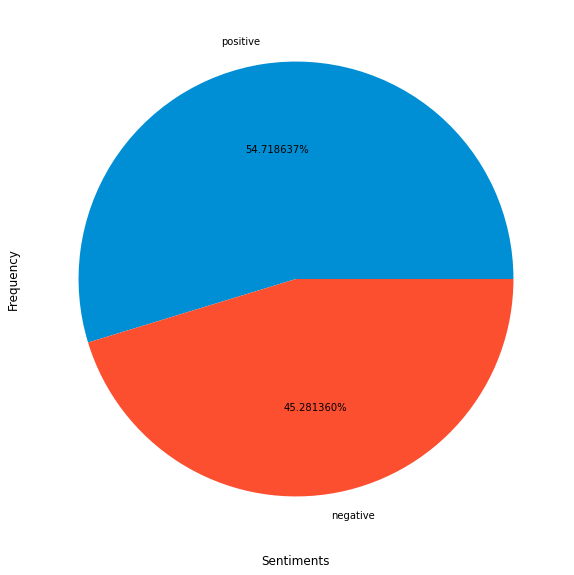

In [8]:

from collections import Counter

# Step 5: plot sentiment and emotions 
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')


# get summary dictionary for sentiment 
moods_list_all = moods_list_st + moods_list_tp
mood_summary = dict(Counter(moods_list_all))

# rename dictionary keys before ploting 
mood_summary['positive'] = mood_summary.pop(1)
mood_summary['negative'] = mood_summary.pop(0)

fig, ax = plt.subplots()
#ax.bar(mmod_summary.keys(), mmod_summary.values())
ax.pie( mood_summary.values(), labels = mood_summary.keys(), autopct='%.6f%%')

# change the width and length of plot 
fig.set_figwidth(10)
fig.set_figheight(10)

# label the plot 
plt.xlabel('Sentiments')
plt.ylabel('Frequency')
#plt.savefig('Sentiments.png')
plt.show()

## Plot For frequent Emotions

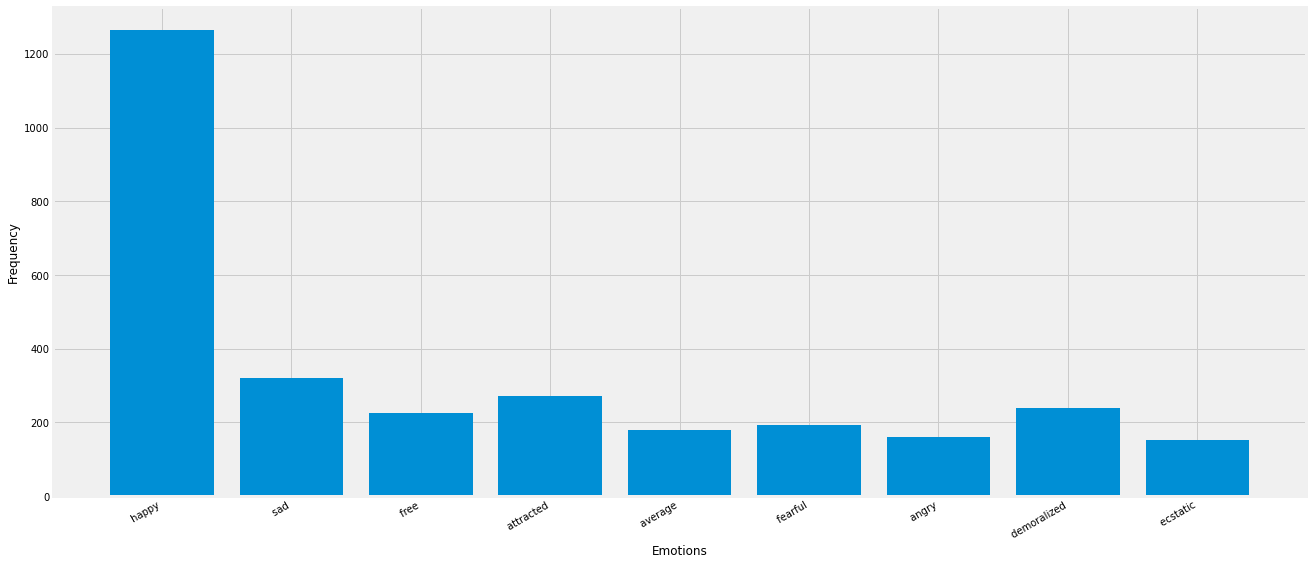

In [9]:
# turn the emotion list into dictionary 
words_score_dict = dict(Counter(temp_emotion_list))

# now let's go more Specifically and just choose emotions with freq more than 150
more_than_150_emotions = dict( (key, value) for (key, value) in words_score_dict.items() if value > 150 )


fig, ax = plt.subplots()
#ax.bar(words_score_dict.keys(), words_score_dict.values())
ax.bar(more_than_150_emotions.keys(), more_than_150_emotions.values())

# the fit the text undre graph 
fig.autofmt_xdate()

# change the width and length of plot 
fig.set_figwidth(20)
fig.set_figheight(10)

# label the plot 
plt.xlabel('Emotions')
plt.ylabel('Frequency')

#save the graph and show it 
#plt.savefig('More_than_15_emotions.png')
plt.show()

### Word Cloud for Emotions

     |████████████████████████████████| 160 kB 5.3 MB/s eta 0:00:01


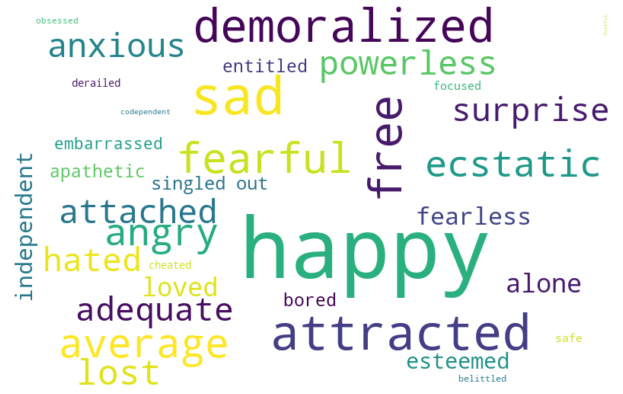

In [11]:
!pip install wordcloud
from wordcloud import WordCloud 

wordcloud = WordCloud(background_color='white', width=800, height=500, random_state=21, max_font_size=110).generate_from_frequencies(words_score_dict) 

plt.figure(figsize=(10, 7)) 
plt.imshow(wordcloud, interpolation="bilinear") 
plt.axis('off') 
plt.show()

## Plot For Frequent Categories 

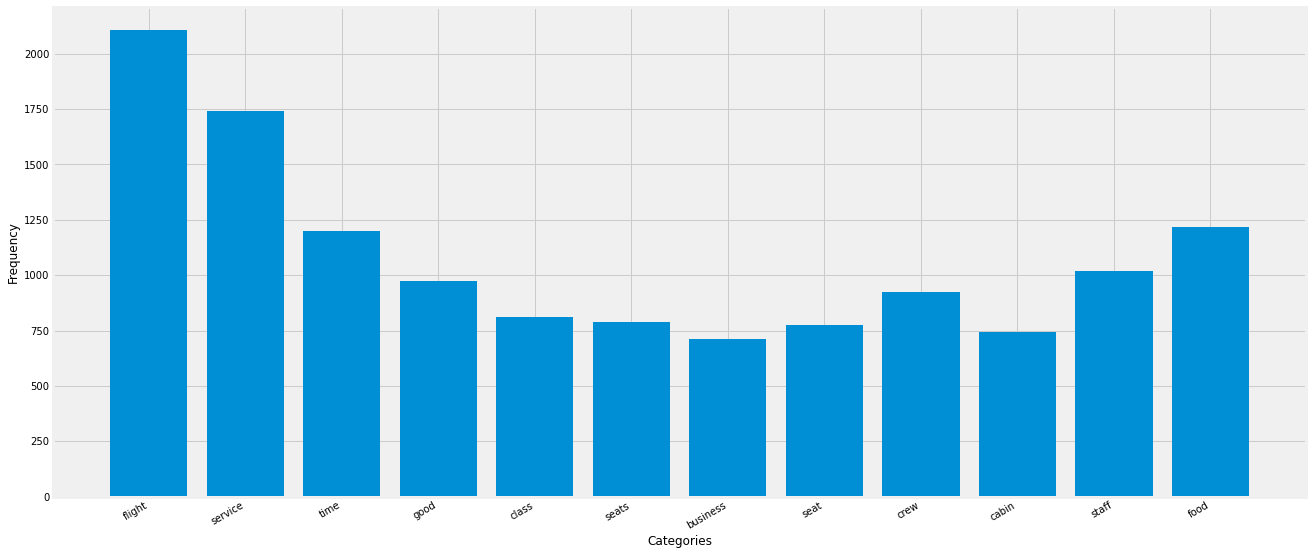

In [12]:
# turn the emotion list into dictionary 
cat_score_dict = dict(Counter(temp_category_list))

# now let's go more Specifically and just choose emotions with freq more than 10
more_than_10_cat = dict( (key, value) for (key, value) in cat_score_dict.items() if value > 10 )


fig, ax = plt.subplots()
ax.bar(more_than_10_cat.keys(), more_than_10_cat.values())

# the fit the text undre graph 
fig.autofmt_xdate()

# change the width and length of plot 
fig.set_figwidth(20)
fig.set_figheight(10)

# label the plot 
plt.xlabel('Categories')
plt.ylabel('Frequency')

#save the graph and show it 
#plt.savefig('More_than_10_categories.png')
plt.show()


### Word Cloud for Categories

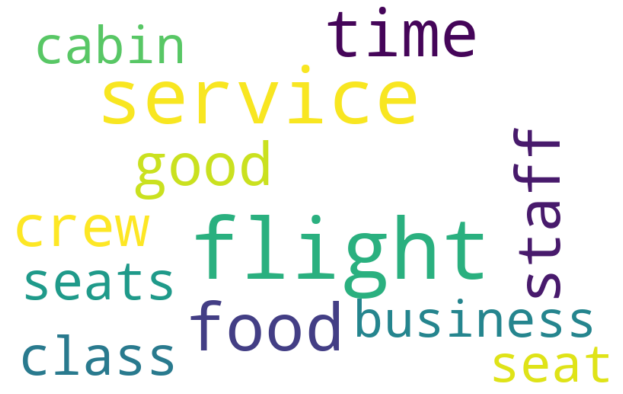

In [13]:
wordcloud = WordCloud(background_color='white', width=800, height=500, random_state=21, max_font_size=110).generate_from_frequencies(cat_score_dict) 

plt.figure(figsize=(10, 7)) 
plt.imshow(wordcloud, interpolation="bilinear") 
plt.axis('off') 
plt.show()

In [19]:
# Bellow , We added a new things  

import os

# List the files in the current directory
files = os.listdir()

for file in files:
    print(file)

#the code lists all the files and directories present in the current directory and prints their names one by one.


emirates-airline-reviews-analysis-nlp.ipynb
Emirates_reviews_trustpilot.csv
database.sqlite
.DS_Store
fork-of-twitter-emirates-airline-sentiment.xpynb
emotion.txt
.ipynb_checkpoints
Emirates_reviews_skytrax.csv
Tweets.csv


In [26]:
# Apply Fork of Twitter Emirates Airline Sentiment


import numpy as np
import pandas as pd
import os

# List the files in the "../input/" directory
files = os.listdir("/Users/Fatma/Desktop/NLP- Project/input")

for file in files:
    print(file)
    
# Any results you write to the current directory are saved as output.

database.sqlite
Tweets.csv


In [67]:
# analyze the sentiment of Emirates Airline reviews in Arabic 
#the reviews list contains 19 sample Emirates Airline reviews in Arabic 

import nltk
from nltk.sentiment import SentimentIntensityAnalyzer

# Initialize the sentiment intensity analyzer
sia = SentimentIntensityAnalyzer()

# Load the dataset of Emirates Airline reviews in Arabic
reviews = [
    "الخدمة ممتازة والطاقم ودود",
    "تجربة سيئة للغاية، الرحلة تأخرت والخدمة كانت سيئة",
    "أحببت رحلتي مع طيران الإمارات، خدمة رائعة ومريحة"
    "الخدمة رائعة والمضيفين محترفين جداً.",
    "لم يتم احترام مواعيد الرحلة وكانت الخدمة سيئة.",
    "تجربة ممتازة مع طيران الإمارات. أنصح به بشدة.",
    "الرحلة كانت مريحة جداً والخدمة ممتازة.",
    "طاقم العمل ودود ومتعاون، أنا سعيد بتجربتي مع طيران الإمارات.",
    "تجربة سيئة، الرحلة تأخرت بشكل كبير ولم يتم تقديم أي اعتذار.",
    "خدمة العملاء رديئة جداً، لا يستجيبون للاستفسارات بشكل مناسب.",
    "مستوى الراحة عالي جداً، المقاعد وسائد واسعة ومريحة.",
    "تجربة رائعة، الإقلاع والهبوط كانا سلسين وسريعين.",
     "تجربة رائعة مع طيران الإمارات، الخدمة ممتازة والطعام لذيذ.",
    "لا يوجد أفضل من طيران الإمارات، كل شيء مثالي من الخدمة إلى الراحة.",
    "تجربة سيئة للغاية، الرحلة تأخرت بشكل كبير والموظفون غير متعاونين.",
    "أنصح بشدة بطيران الإمارات، خدمة ممتازة ومضيفون محترفون.",
    "المقاعد غير مريحة والطعام غير لذيذ، لن أسافر مع طيران الإمارات مرة أخرى.",
    "رحلة ممتعة ومريحة، أحببت الخدمة الرائعة التي قدمها الطاقم.",
    "تجربة سيئة جداً، الرحلة تأخرت والتعامل كان سيئاً من قبل الموظفين.",
    "خدمة ممتازة ورحلة مريحة، طيران الإمارات هو الاختيار الأفضل للسفر.",
]


# Perform sentiment analysis on each review
for review in reviews:
    sentiment_scores = sia.polarity_scores(review)
    sentiment_polarity = sentiment_scores["compound"]

    if sentiment_polarity > 0:
        sentiment_label = "Positive"
    elif sentiment_polarity < 0:
        sentiment_label = "Negative"
    else:
        sentiment_label = "Neutral"

    print("Review:", review)
    print("Sentiment Score:", sentiment_polarity)
    print("Sentiment Label:", sentiment_label)
    print()



Review: الخدمة ممتازة والطاقم ودود
Sentiment Score: 0.0
Sentiment Label: Neutral

Review: تجربة سيئة للغاية، الرحلة تأخرت والخدمة كانت سيئة
Sentiment Score: 0.0
Sentiment Label: Neutral

Review: أحببت رحلتي مع طيران الإمارات، خدمة رائعة ومريحةالخدمة رائعة والمضيفين محترفين جداً.
Sentiment Score: 0.0
Sentiment Label: Neutral

Review: لم يتم احترام مواعيد الرحلة وكانت الخدمة سيئة.
Sentiment Score: 0.0
Sentiment Label: Neutral

Review: تجربة ممتازة مع طيران الإمارات. أنصح به بشدة.
Sentiment Score: 0.0
Sentiment Label: Neutral

Review: الرحلة كانت مريحة جداً والخدمة ممتازة.
Sentiment Score: 0.0
Sentiment Label: Neutral

Review: طاقم العمل ودود ومتعاون، أنا سعيد بتجربتي مع طيران الإمارات.
Sentiment Score: 0.0
Sentiment Label: Neutral

Review: تجربة سيئة، الرحلة تأخرت بشكل كبير ولم يتم تقديم أي اعتذار.
Sentiment Score: 0.0
Sentiment Label: Neutral

Review: خدمة العملاء رديئة جداً، لا يستجيبون للاستفسارات بشكل مناسب.
Sentiment Score: 0.0
Sentiment Label: Neutral

Review: مستوى الراحة عالي جدا

In [47]:
# for filtering a dataset containing flight information for only Emirates Airline
import pandas as pd

# Read the CSV file
df = pd.read_csv('Flight_Information_Arrivals.csv')

# Filter the dataset for Emirates Airline flights
emirates_df = df[df['airlineName'] == 'Emirates']

# Display the first few rows of the filtered dataset
print(emirates_df.head())

#obtain a subset of the original dataset containing only the flight information for Emirates Airline. This allows you to focus specifically on Emirates Airline flights for further analysis or exploration.

   aodbUniqueField flightStatus aircraftRegistration tenMileOut flightNumber  \
0       2147483647    Estimated                A6ECV        NaN       EK 776   
1       2147483647    Estimated                A6EEN        NaN       EK 307   
2       2147483647    Estimated                A6ENI        NaN       EK 399   
4       2147483647    Estimated                A6EDS        NaN       EK 303   
5       2147483647    Estimated                A6ECS        NaN       EK 317   

  trafficTypeCode arrivalOrDeparture          lastChanged airlineCode_iata  \
0              PS                  A  2023-06-12T15:33:39               EK   
1              PS                  A  2023-06-12T15:33:39               EK   
2              PS                  A  2023-06-12T16:50:20               EK   
4              PS                  A  2023-06-12T16:33:43               EK   
5              PS                  A  2023-06-12T15:56:55               EK   

  airlineCode_icao  ... baggageClaimUnit airlineNa

/Users/fatma/opt/anaconda3/envs/Group_22/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3457: DtypeWarning: Columns (31) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [63]:
#sentiment analysis and emotion extraction from Arabic reviews of Emirates Airline
    
# Print the extracted emotions
print("Extracted Emotions:")
print(emotions_counter)

# The code performs sentiment analysis on the provided Arabic reviews and calculates the sentiment score for each review. Additionally, it extracts emotions by considering adjectives and verbs in the text and counts their occurrences. The extracted emotions are then printed as the output.

Extracted Emotions:
Counter({'الخدمة': 1, 'يتم': 1, 'تجربة': 1})
